In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [12]:
data = pd.read_csv('housePrice.csv')
data = data.rename(str.lower, axis='columns')
data = data.rename(columns={'price(usd)': 'price_dollars'})
data.head()

,area,room,parking,warehouse,elevator,address,price,price_dollars
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [13]:
data.area = pd.to_numeric(data.area, errors='coerce')
data.head()

,area,room,parking,warehouse,elevator,address,price,price_dollars
0,63.0,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60.0,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79.0,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95.0,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123.0,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [14]:
data.area.corr(data['price_dollars'])

0.7226470263552709

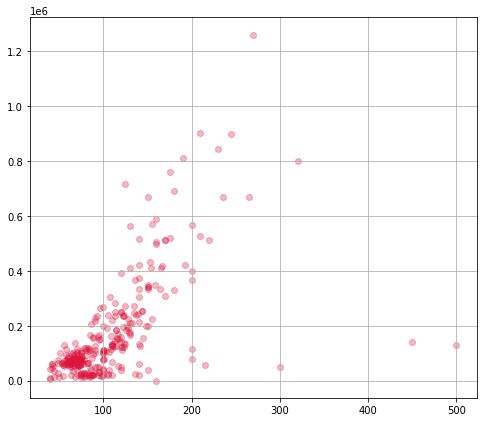

In [19]:
plt.figure(figsize=(8, 7))

x = data.head(300).area
y = data.head(300)['price_dollars']

plt.grid(True)
plt.scatter(x, y, color='crimson', alpha=.3)
plt.show()

In [22]:
data.corr().round(3).style.background_gradient(cmap='coolwarm')

,area,room,parking,warehouse,elevator,price,price_dollars
area,1.000000,0.673000,0.198000,0.077000,0.052000,0.723000,0.723000
room,0.673000,1.000000,0.275000,0.130000,0.182000,0.568000,0.568000
parking,0.198000,0.275000,1.000000,0.432000,0.431000,0.190000,0.190000
warehouse,0.077000,0.130000,0.432000,1.000000,0.203000,0.109000,0.109000
elevator,0.052000,0.182000,0.431000,0.203000,1.000000,0.111000,0.111000
price,0.723000,0.568000,0.190000,0.109000,0.111000,1.000000,1.000000
price_dollars,0.723000,0.568000,0.190000,0.109000,0.111000,1.000000,1.000000


In [30]:
x = np.array([int(i) for i in range(10)])
y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])

n = np.size(x)

m_x = np.mean(x)
m_y = np.mean(y)

SS_xy = np.sum(y*x) - n * m_y * x
SS_xx = np.sum(x*x) - n * m_x * m_x

b_1 = SS_xy / SS_xx
b_0 = m_y - b_1 * m_x

print(f'Coeffs: b_1={np.mean(b_1)}, b_0={np.mean(b_0)}')

Coeffs: b_1=1.1696969696969695, b_0=1.2363636363636363


In [28]:
np.corrcoef(x, y)[0, 1]

0.9759805523748861

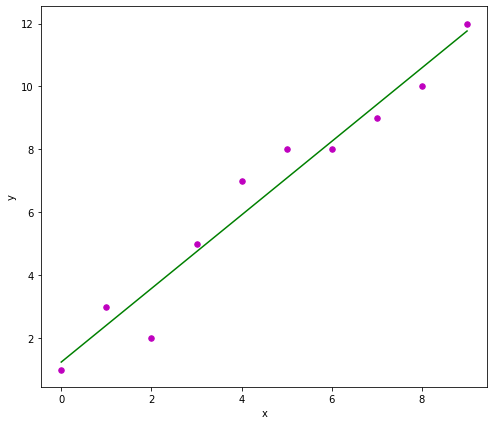

In [35]:
plt.figure(figsize=(8, 7))

plt.scatter(x, y, color='m', marker='o', s=30)

y_pred = np.mean(b_0) + np.mean(b_1) * x

plt.plot(x, y_pred, color='g')

plt.xlabel('x')
plt.ylabel('y')

plt.show()

# Homework

## 1 and 2 Tasks

In [47]:
data = pd.DataFrame(columns=['Улица', 'Гараж'], 
             index=['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница'],
            data = np.array([[80, 100], [98, 82], [105, 75], 
                             [89, 91], [102, 78]])).rename_axis('День')
data

,Улица,Гараж
День,,
Понедельник,80,100
Вторник,98,82
Среда,105,75
Четверг,89,91
Пятница,102,78


In [51]:
x = data['Улица']
y = data['Гараж']
np.corrcoef(x, y)[0, 1]

-1.0

In [53]:
from scipy.stats import pearsonr

pearsonr(x, y)[0]

-1.0

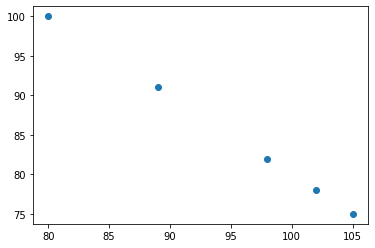

In [54]:
plt.scatter(x, y)

Как мы можем видеть, между данными присутствует полная отрицательная связь

## 3 Task

In [239]:
data = pd.read_csv('bitcoin.csv')
print(data.head())

   Unnamed: 0        time    high     low    open  volumefrom     volumeto  \
0           0  2015-12-20  462.76  431.10  461.20   121531.64  54316484.95   
1           1  2015-12-21  445.54  423.99  441.78   121990.88  53270215.60   
2           2  2015-12-22  443.22  433.25  437.59    65785.54  28845536.39   
3           3  2015-12-23  444.78  434.28  437.03    63247.04  27877349.10   
4           4  2015-12-24  460.62  441.76  442.43    79604.01  36096662.15   

    close  
0  441.78  
1  437.59  
2  437.03  
3  442.43  
4  452.98  


## 4 Task

In [240]:
data['predict'] = data['close'].shift(-14)
data = data.set_index('Unnamed: 0')
data = data.rename_axis('index')
data.head(16)

,time,high,low,open,volumefrom,volumeto,close,predict
index,,,,,,,,
0,2015-12-20,462.76,431.10,461.20,121531.64,54316484.95,441.78,430.70
1,2015-12-21,445.54,423.99,441.78,121990.88,53270215.60,437.59,433.32
2,2015-12-22,443.22,433.25,437.59,65785.54,28845536.39,437.03,431.20
3,2015-12-23,444.78,434.28,437.03,63247.04,27877349.10,442.43,430.82
4,2015-12-24,460.62,441.76,442.43,79604.01,36096662.15,452.98,457.05
5,2015-12-25,457.44,449.52,452.98,42390.82,19251958.85,454.05,452.87
6,2015-12-26,456.48,400.45,454.05,208582.27,88564770.72,415.37,448.31
7,2015-12-27,425.51,406.09,415.37,67581.91,28259303.48,422.39,446.19
8,2015-12-28,429.85,417.14,422.39,68345.44,28978639.73,421.76,447.72


## 5 Task

In [241]:
from sklearn.linear_model import LinearRegression

x = np.array(data.predict, type(float)).reshape(-1, 1)[:-14]
y = np.array(data.close, type(float))[:-14]

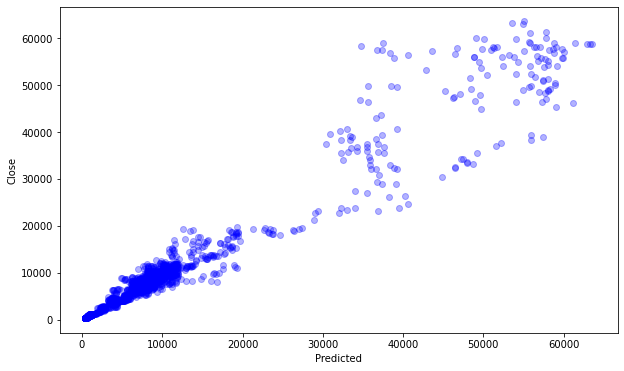

In [242]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='b', alpha=0.3)
plt.xlabel('Predicted')
plt.ylabel('Close')
plt.show()

In [243]:
regression_model = LinearRegression()
regression_model.fit(x, y)

LinearRegression()

In [244]:
regression_model.predict(np.array(data.close).reshape(-1, 1))[-14:]

array([33345.42418777, 34354.05650406, 35916.64437923, 35333.81207665,
       36191.25654972, 37777.29898175, 35504.62535719, 34234.87395836,
       34484.55366619, 32358.18311831, 32191.69799045, 36013.33204715,
       35331.19215275, 35487.1879882 ])

In [245]:
regression_model.predict(x)[-14:]

array([33345.42418777, 34354.05650406, 35916.64437923, 35333.81207665,
       36191.25654972, 37777.29898175, 35504.62535719, 34234.87395836,
       34484.55366619, 32358.18311831, 32191.69799045, 36013.33204715,
       35331.19215275, 35487.1879882 ])

## 6 and 7 Tasks

In [246]:
regression_model.coef_

array([0.95967909])

In [247]:
regression_model.intercept_

129.414724589662

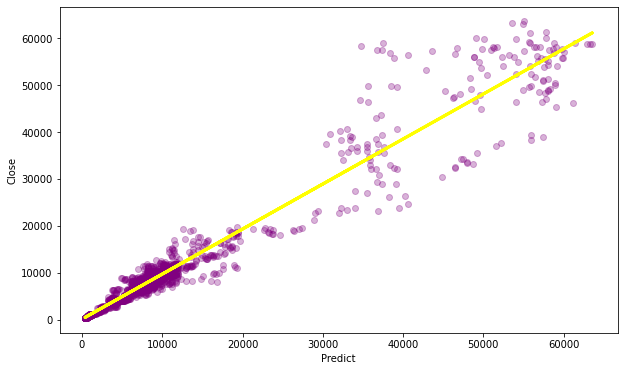

In [248]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=.3, color='purple')

plt.plot(x, regression_model.predict(x), color='yellow', linewidth=3)
# plt.plot(data.close, 
#          regression_model.predict(np.array(data.close).reshape(-1, 1)), 
#          color='green', linewidth=3)

plt.xlabel('Predict')
plt.ylabel('Close')

plt.show()

## 8 and 9 Task

In [249]:
data = pd.read_csv('housePrice.csv')
data.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [250]:
data = data.rename(str.lower, axis='columns')
data.area = pd.to_numeric(data.area, errors='coerce')
data = data.rename(columns={'price(usd)': 'usd'})
data.head()

,area,room,parking,warehouse,elevator,address,price,usd
0,63.0,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60.0,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79.0,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95.0,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123.0,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [251]:
data.corr().round(3).style.background_gradient(cmap='coolwarm')

,area,room,parking,warehouse,elevator,price,usd
area,1.000000,0.673000,0.198000,0.077000,0.052000,0.723000,0.723000
room,0.673000,1.000000,0.275000,0.130000,0.182000,0.568000,0.568000
parking,0.198000,0.275000,1.000000,0.432000,0.431000,0.190000,0.190000
warehouse,0.077000,0.130000,0.432000,1.000000,0.203000,0.109000,0.109000
elevator,0.052000,0.182000,0.431000,0.203000,1.000000,0.111000,0.111000
price,0.723000,0.568000,0.190000,0.109000,0.111000,1.000000,1.000000
usd,0.723000,0.568000,0.190000,0.109000,0.111000,1.000000,1.000000


In [252]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   area       3473 non-null   float64
 1   room       3479 non-null   int64  
 2   parking    3479 non-null   bool   
 3   warehouse  3479 non-null   bool   
 4   elevator   3479 non-null   bool   
 5   address    3456 non-null   object 
 6   price      3479 non-null   float64
 7   usd        3479 non-null   float64
dtypes: bool(3), float64(3), int64(1), object(1)
memory usage: 146.2+ KB


In [253]:
data[data.area.isna()]

,area,room,parking,warehouse,elevator,address,price,usd
570,NaN,2,True,True,True,Ostad Moein,3.310000e+09,110333.33
709,NaN,3,True,True,True,Pasdaran,1.616000e+10,538666.67
807,NaN,2,True,True,False,Damavand,7.000000e+09,233333.33
1604,NaN,2,True,True,True,Gheitarieh,8.700000e+09,290000.00
2171,NaN,2,False,False,False,Shahryar,9.720000e+09,324000.00
2802,NaN,2,True,True,True,Central Janatabad,2.550000e+09,85000.00


In [254]:
data.area.describe()

count    3473.000000
mean      106.774547
std        69.365567
min        30.000000
25%        69.000000
50%        90.000000
75%       120.000000
max       929.000000
Name: area, dtype: float64

In [255]:
data.area.fillna(data.area.mean(), inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   area       3479 non-null   float64
 1   room       3479 non-null   int64  
 2   parking    3479 non-null   bool   
 3   warehouse  3479 non-null   bool   
 4   elevator   3479 non-null   bool   
 5   address    3456 non-null   object 
 6   price      3479 non-null   float64
 7   usd        3479 non-null   float64
dtypes: bool(3), float64(3), int64(1), object(1)
memory usage: 146.2+ KB


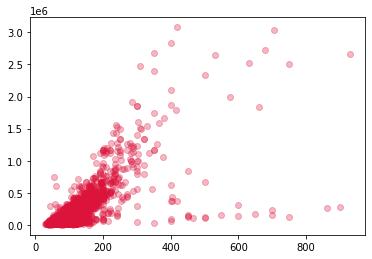

In [256]:
x = np.array(data.area)
y = np.array(data.usd)

plt.scatter(x, y, color='crimson', alpha=.3)

## 10, 11 and 12 Tasks

In [257]:
n = np.size(x)

m_x = np.mean(x)
m_y = np.mean(y)

SS_xy = np.sum(y*x) - n * m_y * x
SS_xx = np.sum(x*x) - n * m_x * m_x

b_1 = SS_xy / SS_xx
b_0 = m_y - b_1 * m_x

print(f'Coeffs: b_1={np.mean(b_1)}, b_0={np.mean(b_0)}')

Coeffs: b_1=2814.2556027896558, b_0=-121856.7753221175


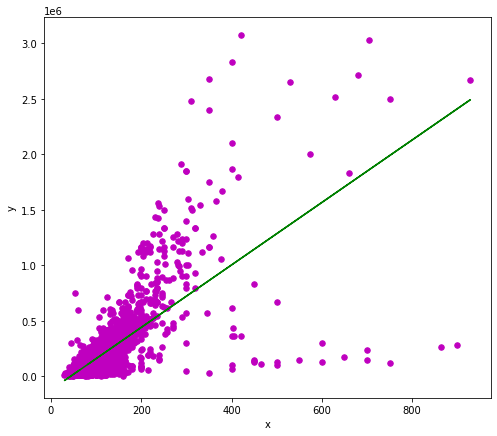

In [258]:
plt.figure(figsize=(8, 7))

plt.scatter(x, y, color='m', marker='o', s=30)

y_pred = np.mean(b_0) + np.mean(b_1) * x

plt.plot(x, y_pred, color='g')

plt.xlabel('x')
plt.ylabel('y')

plt.show()